In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Tensorflow has mnist built in
# so, load the data directly
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# shape of the dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


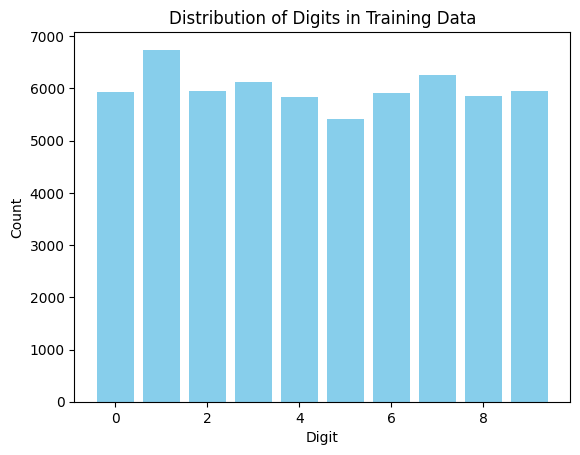

In [6]:
# digit distribution (counting unique number of digits and then usie the numbers to plot a bar graph)
unique, counts = np.unique(y_train, return_counts=True)

plt.bar(unique, counts, color='skyblue')
plt.title("Distribution of Digits in Training Data")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

In [7]:
# pixel distribution
print("Pixel value range:")
print("Min:", x_train.min())
print("Max:", x_train.max())

Pixel value range:
Min: 0
Max: 255


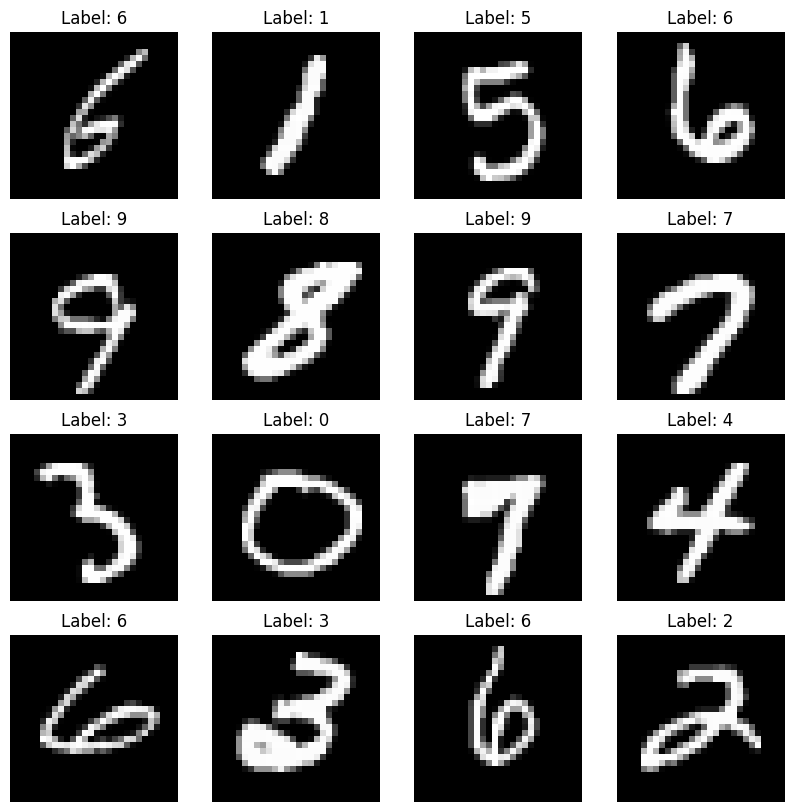

In [8]:
# visulaizing 4x4 grid of random handwritten digits
# it is randomly taking numbers from x_train
# show image in grayscale along with the labels

plt.figure(figsize=(10,10))

for i in range(16):
    index = np.random.randint(0, len(x_train))
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f"Label: {y_train[index]}")
    plt.axis('off')

plt.show()

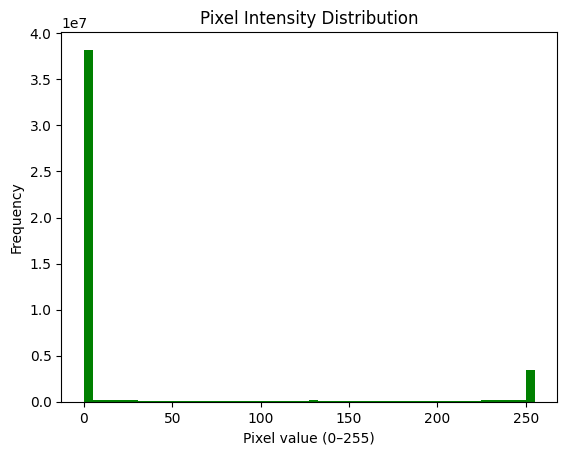

In [10]:
# pixel intensity distribution (peak at 0(black) and 255(white))
plt.hist(x_train.reshape(-1), bins=50, color='green')
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel value (0–255)")
plt.ylabel("Frequency")
plt.show()


In [11]:
# normalizing the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
# splitting the datset into train, validation and test data
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    test_size=0.1667,  # 10,000 of 60,000 (approx 1/6)
    random_state=42
)

In [13]:
# checking the shape of dataset again
print("Training set:", x_train.shape)
print("Validation set:", x_val.shape)
print("Test set:", x_test.shape)

Training set: (49998, 28, 28)
Validation set: (10002, 28, 28)
Test set: (10000, 28, 28)


In [14]:
print("Min pixel value after normalization:", x_train.min())
print("Max pixel value after normalization:", x_train.max())

Min pixel value after normalization: 0.0
Max pixel value after normalization: 1.0


In [20]:
# building the neural network

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Add Flatten layer here
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes for digits 0–9
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
#compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_data=(x_val, y_val)
)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8070 - loss: 0.6623 - val_accuracy: 0.9482 - val_loss: 0.1768
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9536 - loss: 0.1583 - val_accuracy: 0.9568 - val_loss: 0.1424
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9691 - loss: 0.1054 - val_accuracy: 0.9641 - val_loss: 0.1108
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9772 - loss: 0.0785 - val_accuracy: 0.9715 - val_loss: 0.0916
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9818 - loss: 0.0608 - val_accuracy: 0.9751 - val_loss: 0.0830


In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy (Neural Network):", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9701 - loss: 0.0921
Test accuracy (Neural Network): 0.9742000102996826


In [33]:
import numpy as np

# Predict probabilities for each class
y_pred = model.predict(x_test)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [34]:
misclassified_indices = np.where(y_pred_classes != y_test)[0]
print("Number of misclassified samples:", len(misclassified_indices))

Number of misclassified samples: 258


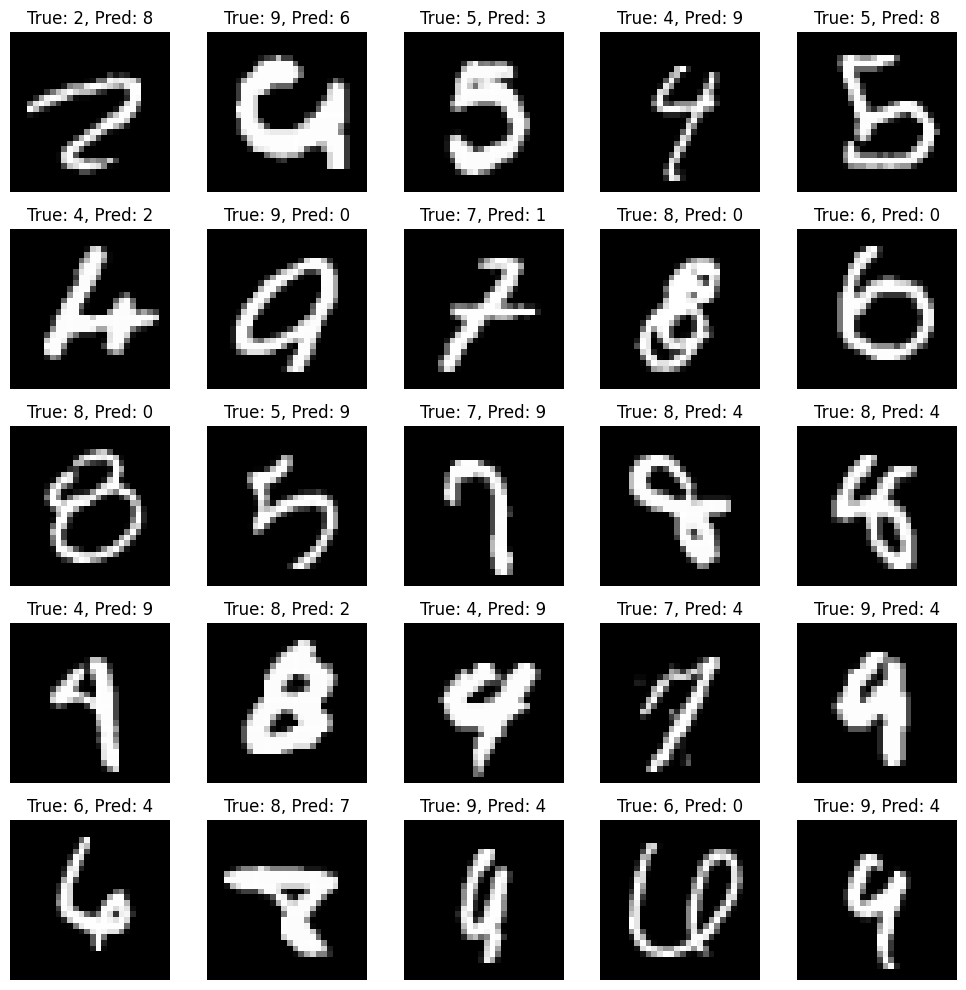

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i, idx in enumerate(np.random.choice(misclassified_indices, 25, replace=False)):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


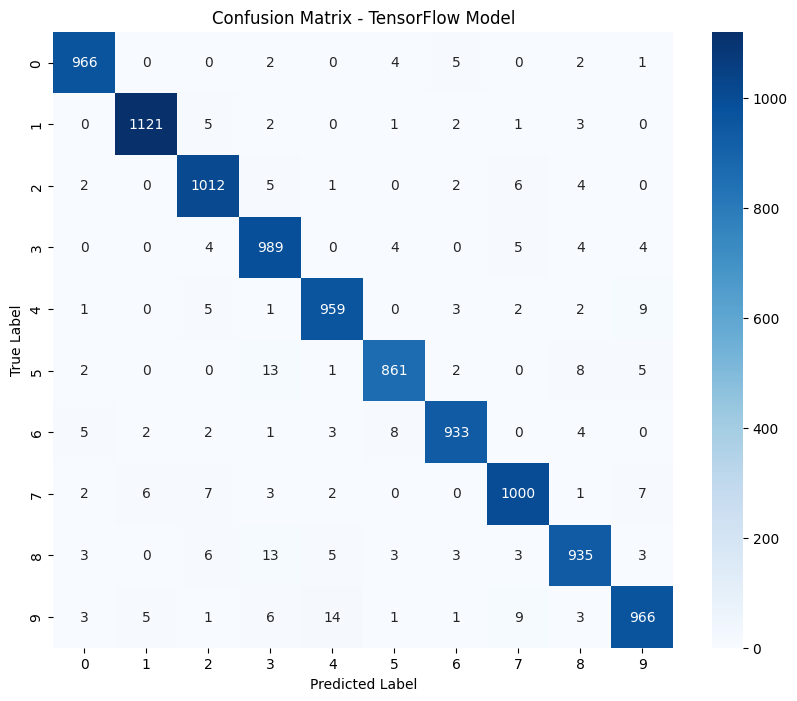

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - TensorFlow Model')
plt.show()


In [37]:
correct_indices = np.where(y_pred_classes == y_test)[0]
print("Number of correctly classified samples:", len(correct_indices))

Number of correctly classified samples: 9742


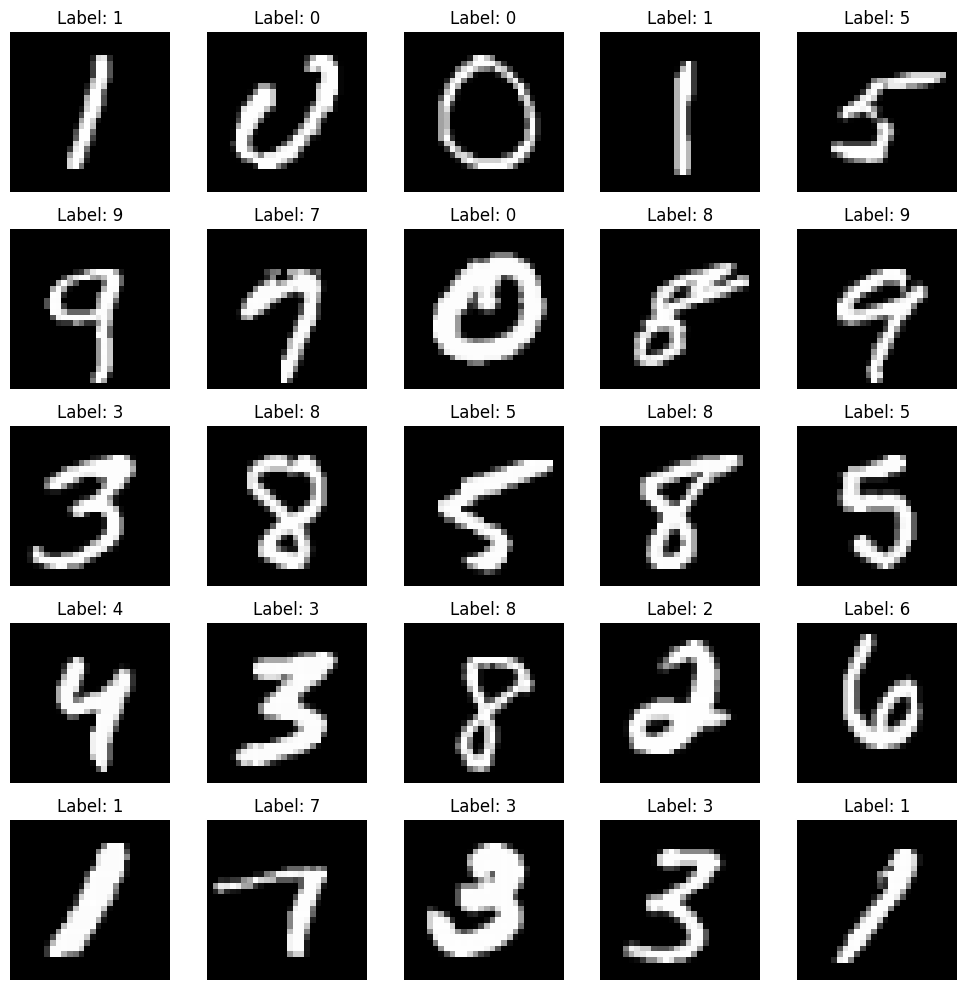

In [38]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
for i, idx in enumerate(np.random.choice(correct_indices, 25, replace=False)):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_test[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()




---



In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Use smaller dataset for faster training (since logistic regression is slower)
x_train_small = x_train[:10000]
y_train_small = y_train[:10000]

# Flatten the images for Logistic Regression
x_train_small_flat = x_train_small.reshape(x_train_small.shape[0], -1)

In [29]:
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
log_reg.fit(x_train_small_flat, y_train_small)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [31]:
x_test_flat = x_test.reshape(x_test.shape[0], -1)
y_pred = log_reg.predict(x_test_flat)
acc = accuracy_score(y_test, y_pred)
print("Test accuracy (Logistic Regression):", acc)

Test accuracy (Logistic Regression): 0.906


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       980
           1       0.96      0.97      0.96      1135
           2       0.91      0.88      0.89      1032
           3       0.88      0.90      0.89      1010
           4       0.90      0.91      0.91       982
           5       0.87      0.85      0.86       892
           6       0.93      0.93      0.93       958
           7       0.91      0.92      0.91      1028
           8       0.86      0.85      0.85       974
           9       0.89      0.88      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.91      0.91      0.91     10000



In [39]:
import numpy as np

correct_indices = np.where(y_pred_classes == y_test)[0]
misclassified_indices = np.where(y_pred_classes != y_test)[0]

print("Correctly classified samples:", len(correct_indices))
print("Misclassified samples:", len(misclassified_indices))


Correctly classified samples: 9742
Misclassified samples: 258


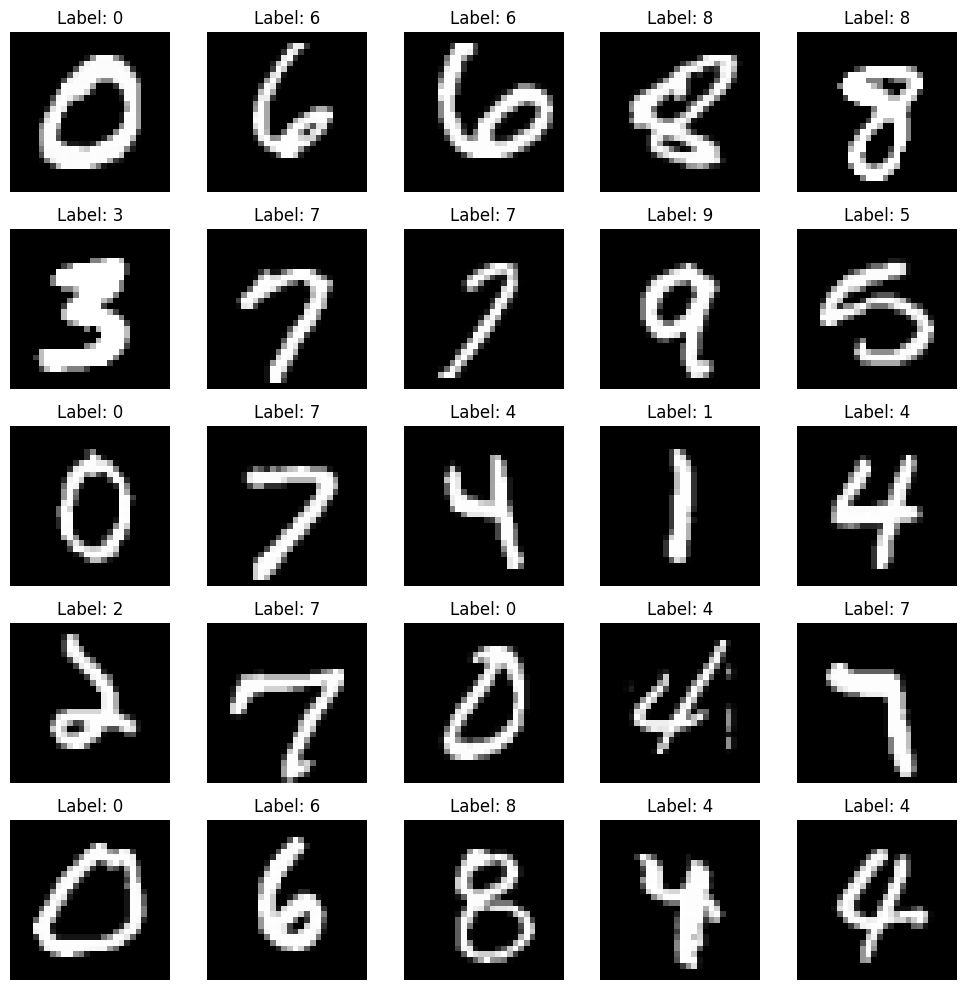

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i, idx in enumerate(np.random.choice(correct_indices, 25, replace=False)):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_test[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


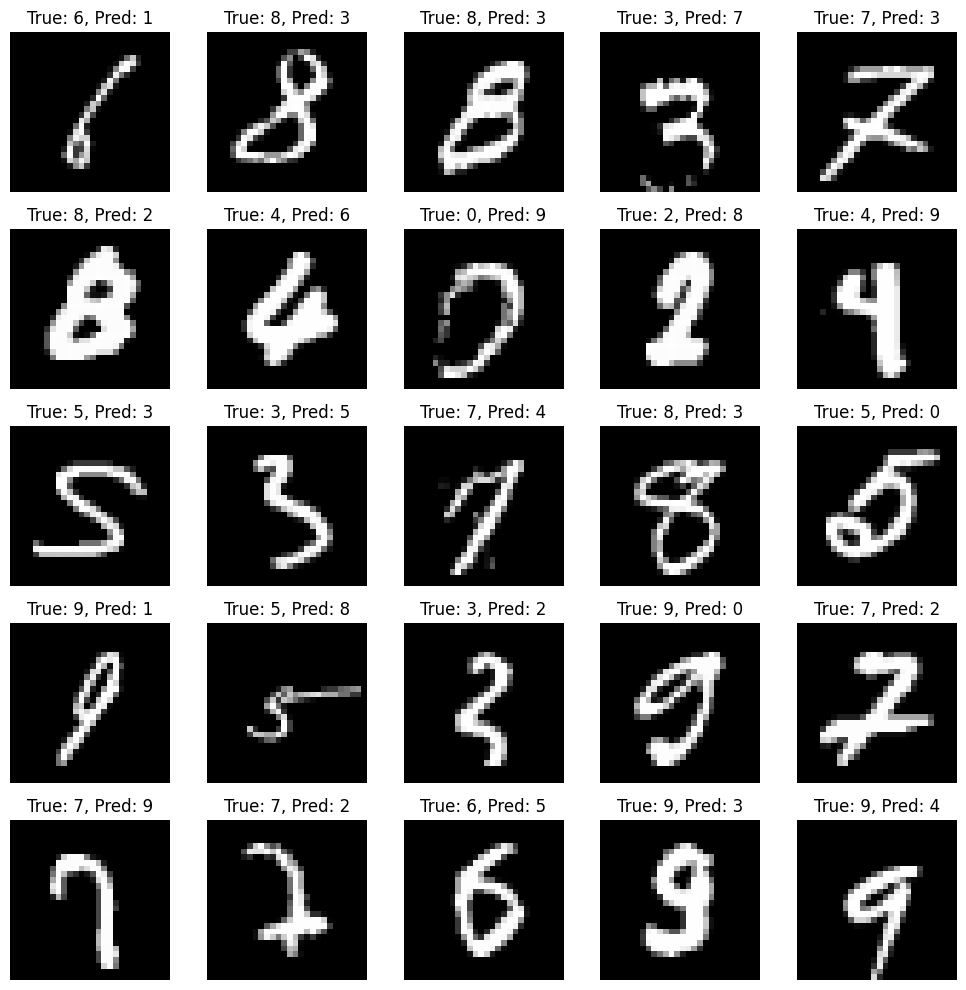

In [41]:
plt.figure(figsize=(10,10))
for i, idx in enumerate(np.random.choice(misclassified_indices, 25, replace=False)):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


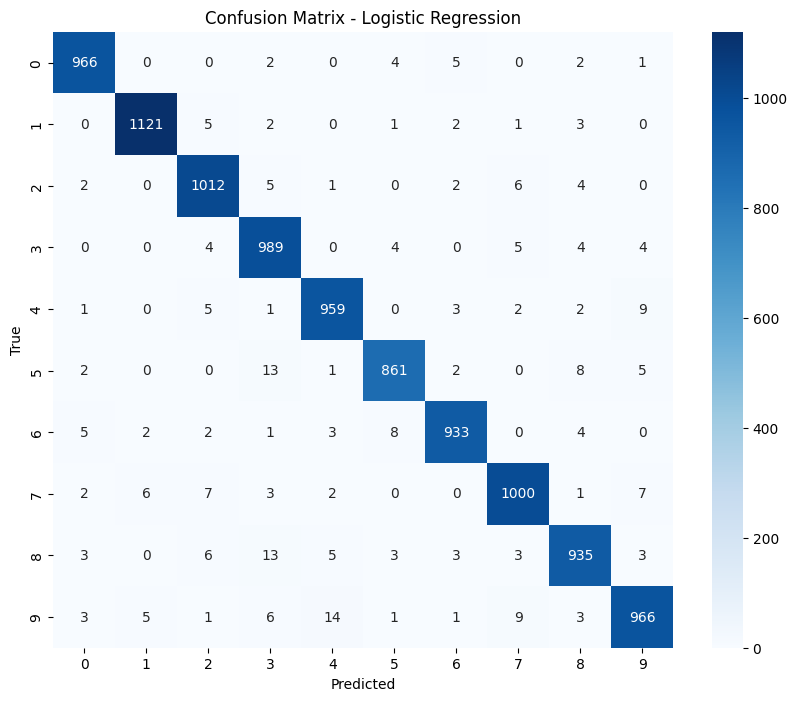

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
